<a href="https://colab.research.google.com/github/tomiokario/MNIST_numeric_classifier/blob/master/MNIST_classifier1_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feedforward neural networkによるMNIST手書き文字分類

TensorFlow & Kerasを用いた実装

参考：[Tensorfrowで画像分類など学習してみる（手書き文字認識編１） - Qiita](https://qiita.com/kazuboy/items/b898b380fca716cf35b4)



## 1. データの取得

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#ヘルパーのライブラリ読み込み。画像を表示する場合に利用します。
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() # データロード

### データをチェック

x_train：60000枚の画像データ(28*28)

x_test ：10000枚の画像データ(28*28)

y_train：60000枚分のラベルデータ

y_test ：10000枚分のラベルデータ

In [ ]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


データを表示

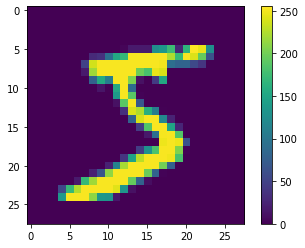

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


## 2. データの前処理

スケール変換，正規化，ラベルを配列に変換

### 画像データのスケール変換

MNISTデータを利用できる形に変換する

28*28の二次元配列→784の一次元配列

In [ ]:
# データスケール変換: (28*28)→(784)
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784) 

結果を確認

In [ ]:
#変換後の構造を確認する。
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)


### データの正規化

ピクセル値の範囲を0~255から0~1に変換する

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

### ラベルデータの変換

要素10のboolean配列に変換する

e.g. "2"→[0,0,1,0,0,0,0,0,0,0]

KerasのUtilsモジュール内，tocategoricalメソッドを使用

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 3. モデルの構築

KerasのSequential APIを利用する

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

#### 3層順伝播型ニューラルネットワーク

3層の順伝搬型ニューラルネットワークの各層を構築

**中間層の追加**

Sequential APIのaddメソッドを用いて追加

Denseレイヤーを用いて全結合層を追加

・units：出力する次元の数=中間層として出力するニューロンの数

・input_shape：入力される行列の形(入力次元の784を使用)

・activation：活性化関数


※全結合層：全ての入力が全てのニューロンと結合する構造を持つ層

In [ ]:
from tensorflow.keras.layers import Dense

model.add(
    Dense(
        units=64,
        input_shape=(784,),
        activation='relu'
    )
)

**出力層を追加**

In [ ]:
model.add(
    Dense(
        units=10,
        activation='softmax'
    )
)

#### 学習の準備

学習に使うオプティマイザと損失関数を構築

・optimizer：最適化手法(今回はAdam)

・loss：損失関数

・metrics：評価関数

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 4. モデルの学習

データを用いたモデルの訓練


**kerasのfit関数を利用した学習**

fit関数：固定のエポック数でモデルを訓練する関数

・第一引数：訓練データ

・第二引数：訓練ラベル

・batch_size：バッチサイズ(整数 or None)

・epochs：訓練に使うエポック数(整数)

・validation_sprit：一部を訓練の検証データに使用する場合に指定する．

　　※今回は0.2(8割を訓練，2割を検証に使う)

**結果**

・loss：損失関数の値

・accuracy：訓練データに対する正解率

・val_loss：未知のデータ(sprit data)に対する損失関数の値

・val_accuracy：未知のデータ(sprit data)に対する正解率

※基本的にEpochを重ねるたびにlossが減少しaccuracyが増加する．
しかし，過剰に進めるとval_lossやval_accuracyが悪化することがある(過学習)

In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 2.9277 - accuracy: 0.7717 - val_loss: 0.7434 - val_accuracy: 0.8267
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5686 - accuracy: 0.8562 - val_loss: 0.4841 - val_accuracy: 0.8717
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8985 - val_loss: 0.3587 - val_accuracy: 0.9065
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.9200 - val_loss: 0.2992 - val_accuracy: 0.9291
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9286 - val_loss: 0.2836 - val_accuracy: 0.9278
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9331 - val_loss: 0.2870 - val_accuracy: 0.9331
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2376 - accuracy: 0.9375 - val_loss: 0.2629 - val_accuracy:

## 5. モデルの評価

検証用データを用いてモデルの正解率を評価する

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9394000172615051


## 6. モデルによる予測

手書き文字セットの各評価用データのラベルを予測してみる


predict関数を使用

In [ ]:
predictions = model.predict(x_test)

先頭の要素の予測値をチェック

In [ ]:
predictions[0]

array([1.6136895e-30, 5.6601659e-12, 1.6545973e-10, 2.8162555e-07,
       1.3717188e-19, 4.6207212e-17, 1.0790975e-32, 9.9999976e-01,
       2.3073640e-14, 4.9712401e-20], dtype=float32)

最も可能性の高い数字を出力

In [ ]:
np.argmax(predictions[0])

7

正解(ラベル)を確認

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

正解(画像)を確認

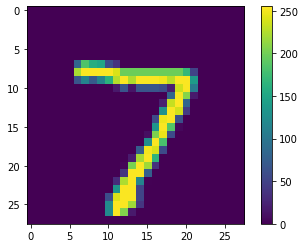

In [ ]:
x_test_image = x_test[0].reshape(28, 28) 

plt.figure()
plt.imshow(x_test_image)
plt.colorbar()
plt.grid(False)
plt.show()